# Algorithm Performance Data Analysis - Consolidation 1

Test Parameters 

| Test | QuadTreeThreshold | AllowedExceedingThresholdFactor | Score | 
| --- | --- | --- | ---| 
| Test231031-1 | 120 | 0.001 | 0.400657 | 
| Test231031-1 | 130 | 0.001 | 0.388582 | 
| Test231031-1 | 110 | 0.001 | 0.379369 | 
| Test231031-4 | 128 | 0.00003 | 0.270429 | 
| Test231031-4 | 128 | 0.00003 | 0.265261 | 
| Test231031-4 | 128 | 0.00002 | 0.264373 | 
| Test231101A-3 | 133 | 0.00003 | 0.305497 | 
| Test231101A-3 | 136 | 0.00000 | 0.304271 | 
| Test231101A-3 | 135 | 0.00031 | 0.294660 | 
| Test231101B-2 | 135 | 0.000025 | 0.336467 | 
| Test231101B-2 | 136 | 0.000030 | 0.324084 | 
| Test231101B-2 | 135 | 0.000155 | 0.312431 | 

In [16]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_174417_comsolidation1.csv')

In [3]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_174417,10404007.png,502730,25761,476969,0.948758,19,12,61265,3726,57539,0.939182,25.164213,3281.945675,12.969490,120,0.001000
1,2,test_20231101_174417,1254659.png,342646,84144,258502,0.754429,4,25,80080,11662,68418,0.854371,20.031966,2929.377861,13.463050,120,0.001000
2,3,test_20231101_174417,10188041.png,221231,10496,210735,0.952556,3,5,41731,1483,40248,0.964463,10.761733,1020.367216,18.043239,120,0.001000
3,4,test_20231101_174417,10287332.png,216980,13551,203429,0.937547,2,4,22337,1850,20487,0.917178,9.356640,750.804448,19.375535,120,0.001000
4,5,test_20231101_174417,11610969.png,368720,30684,338036,0.916782,3,4,84111,4481,79630,0.946725,20.176567,2670.363557,13.865100,120,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,6,test_20231101_174425,10350842.png,212614,3384,209230,0.984084,2,4,42529,499,42030,0.988267,22.827879,3246.082464,13.017208,135,0.000155
116,7,test_20231101_174425,10863862.png,317432,6024,311408,0.981023,1,3,66058,886,65172,0.986588,36.046560,6605.741237,9.931588,135,0.000155
117,8,test_20231101_174425,11382381.png,312486,639,311847,0.997955,1,4,46745,87,46658,0.998139,22.338322,2675.869067,13.856155,135,0.000155
118,9,test_20231101_174425,11079715.png,443815,94746,349069,0.786519,3,4,124136,13324,110812,0.892666,18.728500,2605.731483,13.971507,135,0.000155


In [4]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000
mean,5.500000,321053.700000,24954.37500,296099.325000,0.932116,2.208333,4.183333,60908.400000,3521.341667,57387.058333,0.954359,20.159099,2732.972734,14.293665,129.50000,0.000385
std,2.884324,93056.921193,34421.81635,80810.147043,0.081552,1.753248,2.500364,27969.139344,4800.979465,24056.484682,0.043505,6.407264,1344.519721,2.230227,7.47545,0.000373
min,1.000000,212614.000000,156.00000,201056.000000,0.648471,1.000000,3.000000,22337.000000,22.000000,20167.000000,0.823914,9.076064,685.258741,9.816714,110.00000,0.000000
25%,3.000000,221231.000000,3819.00000,213482.000000,0.935994,2.000000,3.000000,41731.000000,562.750000,40627.250000,0.927500,17.422311,1813.215320,12.698098,128.00000,0.000124
50%,5.500000,314959.000000,10521.00000,289935.000000,0.964052,2.000000,4.000000,54005.000000,1520.500000,50886.000000,0.969736,20.910244,2605.731483,13.971507,131.50000,0.000300
75%,8.000000,368720.000000,23459.00000,332067.250000,0.982308,2.000000,4.000000,80080.000000,3427.000000,71125.500000,0.987367,23.899850,3493.593668,15.546317,135.00000,0.000483
max,10.000000,502730.000000,156014.00000,491056.000000,0.999426,19.000000,25.000000,124136.000000,21524.000000,111121.000000,0.999451,36.777687,6782.798960,19.772258,136.00000,0.001000


## Analyze per Image

In [5]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [6]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_174417,10404007.png,502730,25761,476969,0.948758,19,12,61265,3726,57539,0.939182,25.164213,3281.945675,12.969490,120,0.001000
10,1,test_20231101_174418,10404007.png,502730,14789,487941,0.970583,2,4,61265,2153,59112,0.964858,26.675524,3677.093547,12.475757,130,0.001000
20,1,test_20231101_174419,10404007.png,502730,43559,459171,0.913355,3,10,61265,6190,55075,0.898964,24.104626,2998.838688,13.361273,110,0.001000
30,1,test_20231101_174420,10404007.png,502730,18024,484706,0.964148,2,4,61265,2618,58647,0.957268,25.992037,3511.230128,12.676211,128,0.000300
40,1,test_20231101_174420,10404007.png,502730,18024,484706,0.964148,2,3,61265,2618,58647,0.957268,25.992037,3511.230128,12.676211,128,0.000300
50,1,test_20231101_174421,10404007.png,502730,18524,484206,0.963153,2,4,61265,2687,58578,0.956141,25.885536,3487.714848,12.705394,128,0.000200
60,1,test_20231101_174422,10404007.png,502730,13864,488866,0.972423,2,3,61265,2019,59246,0.967045,26.433330,3634.177589,12.526742,133,0.000300
70,1,test_20231101_174422,10404007.png,502730,11674,491056,0.976779,2,3,61265,1709,59556,0.972105,26.583518,3681.730811,12.470283,136,0.000000
80,1,test_20231101_174423,10404007.png,502730,11974,490756,0.976182,2,4,61265,1754,59511,0.971370,26.782478,3724.003221,12.420703,135,0.000310
90,1,test_20231101_174424,10404007.png,502730,12154,490576,0.975824,2,3,61265,1779,59486,0.970962,26.559920,3673.928880,12.479496,135,0.000025


## Analyze per Test

In [17]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_48361/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [9]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231101_174417,120,0.001000,5.5,321053.7,31986.1,289067.6,0.912841,4.40,7.10,60908.4,4489.9,56418.5,0.941367,18.361617,2234.501933,15.029641
1,test_20231101_174418,130,0.001000,5.5,321053.7,23768.1,297285.6,0.935702,1.80,3.70,60908.4,3364.8,57543.6,0.956924,21.460160,3033.289519,13.907701
2,test_20231101_174419,110,0.001000,5.5,321053.7,41018.2,280035.5,0.888271,2.40,4.00,60908.4,5700.2,55208.2,0.924269,16.703051,1860.840878,15.805732
3,test_20231101_174420,128,0.000300,5.5,321053.7,26236.9,294816.8,0.928342,2.05,4.55,60908.4,3705.3,57203.1,0.951728,19.180082,2446.432293,14.663083
4,test_20231101_174421,128,0.000200,5.5,321053.7,26419.2,294634.5,0.927815,2.00,3.50,60908.4,3731.3,57177.1,0.951279,18.938519,2405.139518,14.743231
5,test_20231101_174422,133,0.000300,5.5,321053.7,22027.9,299025.8,0.940128,2.30,3.70,60908.4,3122.7,57785.7,0.959759,21.251686,3012.047137,13.877277
6,test_20231101_174422,136,0.000000,5.5,321053.7,19847.4,301206.3,0.946329,2.00,3.90,60908.4,2817.7,58090.7,0.964320,21.340325,3090.857679,13.674089
7,test_20231101_174423,135,0.000310,5.5,321053.7,20585.6,300468.1,0.944129,1.90,4.30,60908.4,2919.3,57989.1,0.962531,21.615618,3107.524999,13.752948
8,test_20231101_174424,135,0.000025,5.5,321053.7,20759.4,300294.3,0.943509,1.90,3.50,60908.4,2943.9,57964.5,0.961972,21.076547,2992.489337,13.932524
9,test_20231101_174425,135,0.000155,5.5,321053.7,20720.4,300333.3,0.943659,1.90,3.70,60908.4,2938.1,57970.3,0.962108,21.388195,3065.403462,13.817743


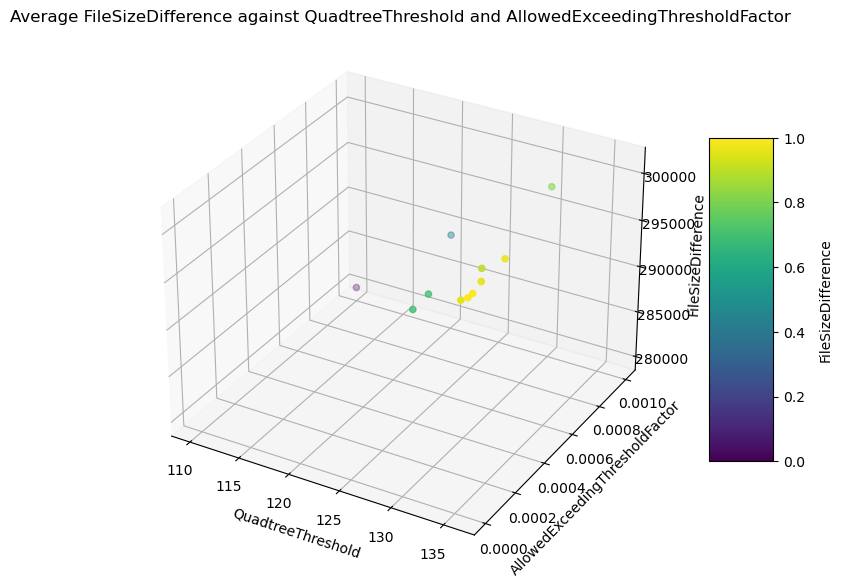

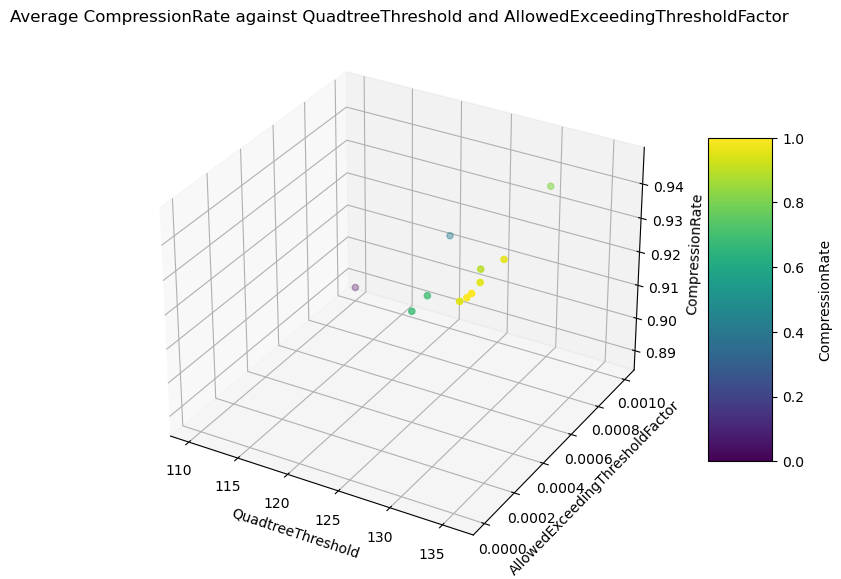

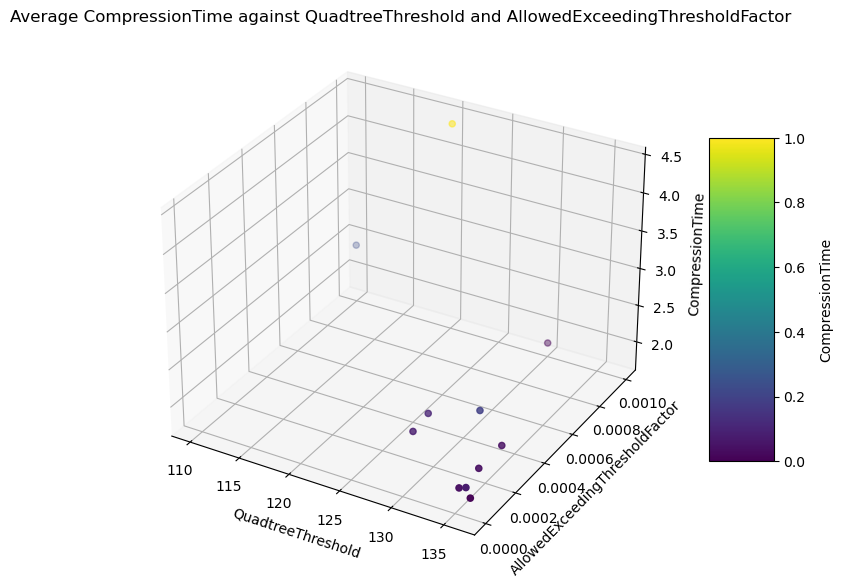

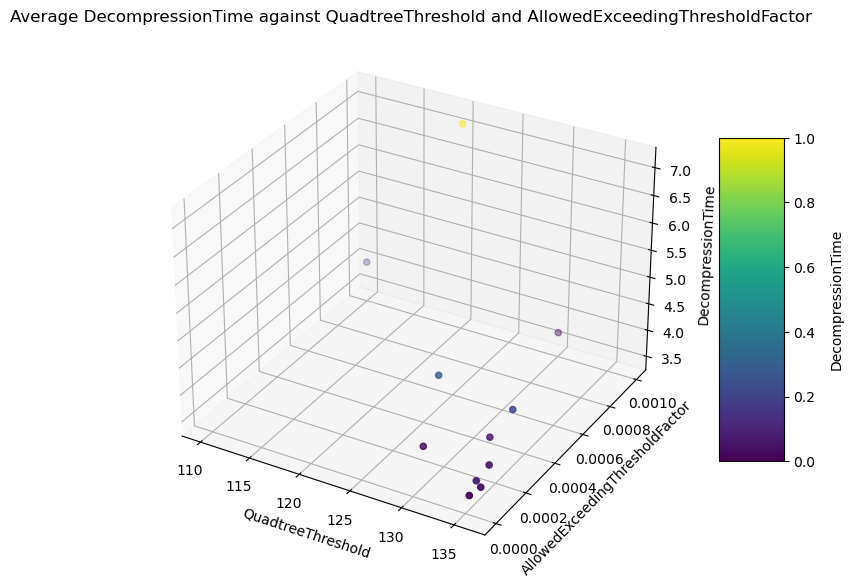

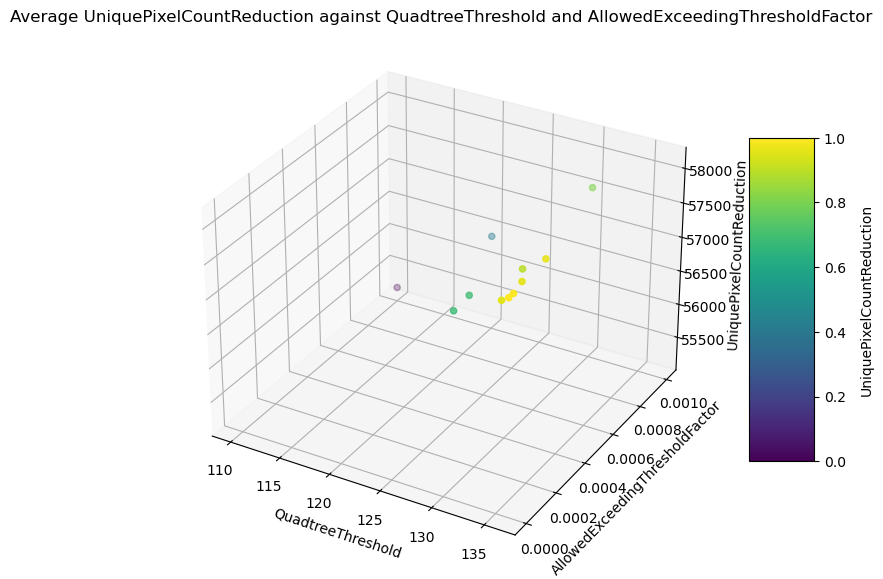

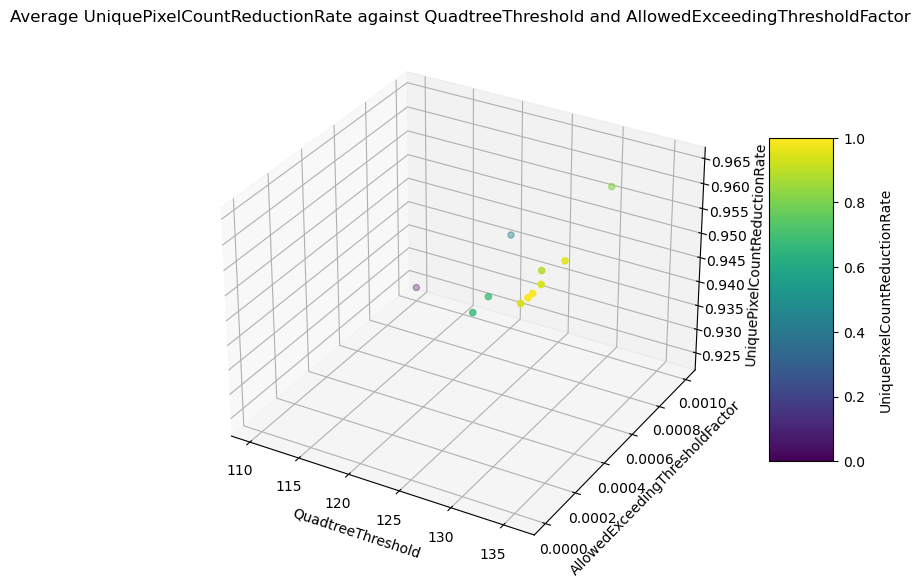

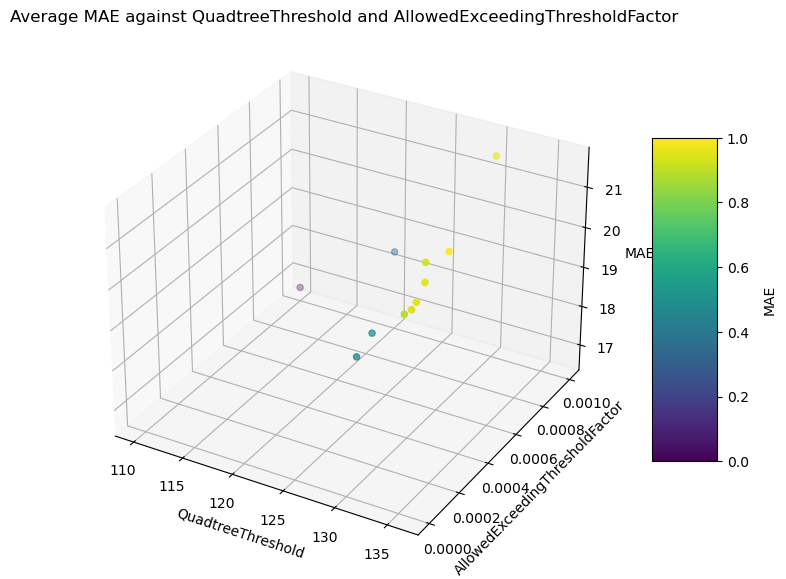

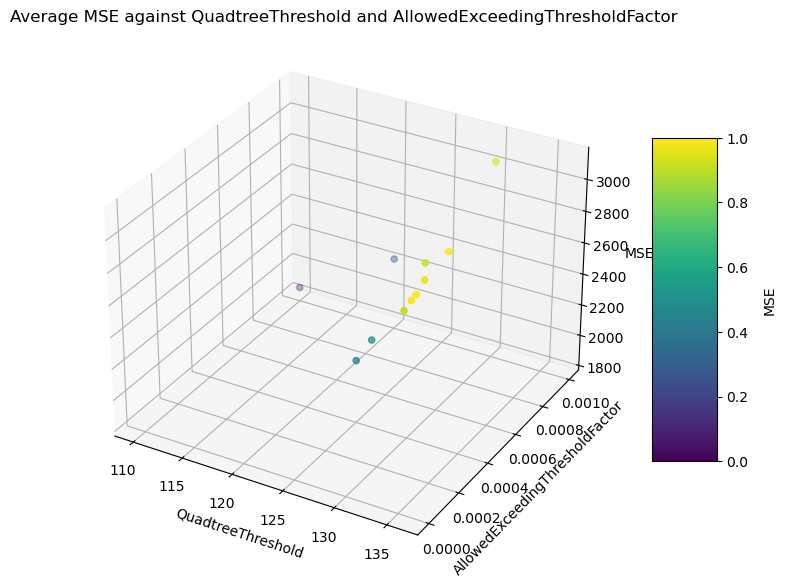

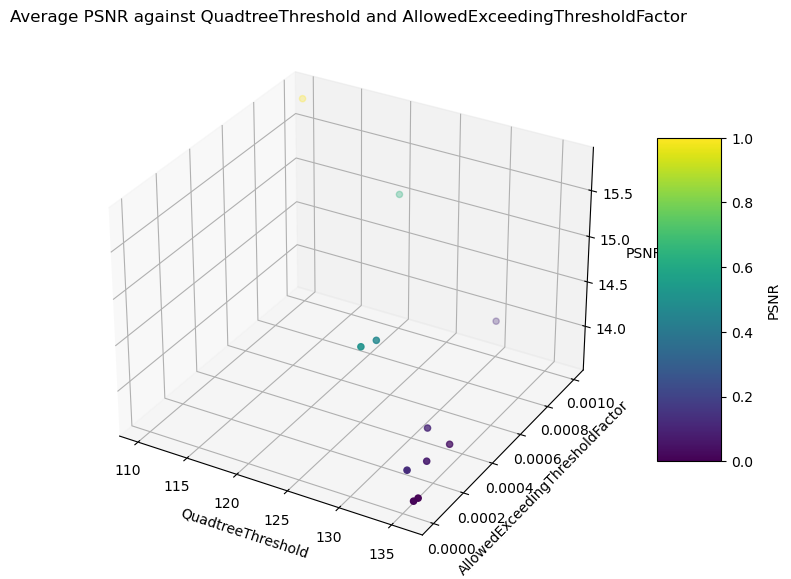

In [10]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


## Score and Evaluation

In [12]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

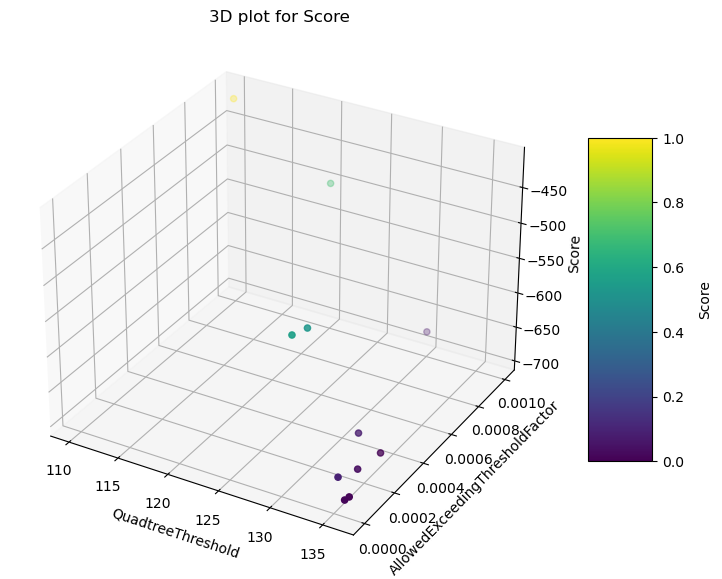

In [18]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

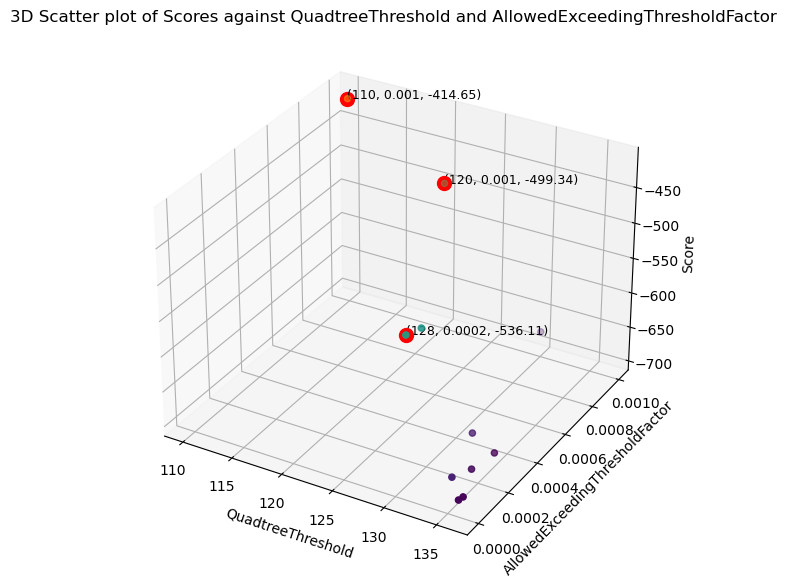

In [19]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [20]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


   QuadtreeThreshold  AllowedExceedingThresholdFactor       Score
2                110                           0.0010 -414.648338
0                120                           0.0010 -499.344846
4                128                           0.0002 -536.114504
